In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [16]:
df.replace("unknown", np.nan, inplace=True)
df.dropna(inplace=True)

In [17]:
X = df.drop('deposit', axis=1)
y = df['deposit']

In [18]:
encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = encoder.fit_transform(X[col])

In [19]:
y = y.map({'no': 0, 'yes': 1})

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [21]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

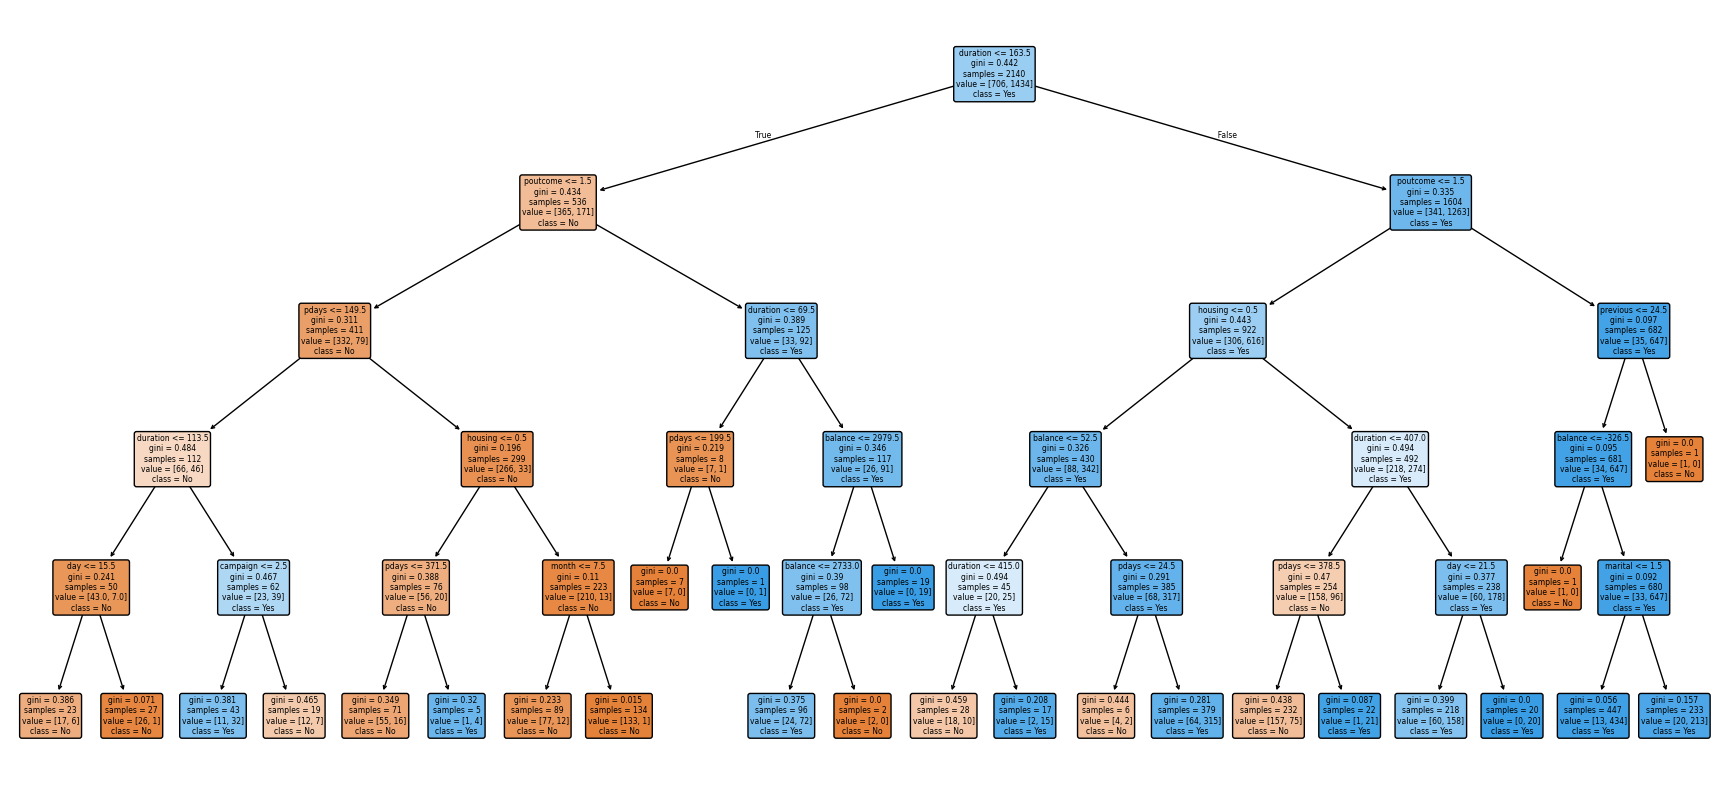

In [22]:
plt.figure(figsize=(22, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True
)
plt.show()

In [23]:
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 0.8476635514018691
Test Accuracy : 0.8261682242990654

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       183
           1       0.86      0.88      0.87       352

    accuracy                           0.83       535
   macro avg       0.81      0.80      0.81       535
weighted avg       0.83      0.83      0.83       535

